# De quoi s'agit-il ?

Dans ce post, je montre comment convertir un dataset YOLO en format COCO en utilisant la bibliothèque Python globox, une solution pratique que j'ai récemment appliquée pour un projet de segmentation d'instance. Globox permet également de faire l'inverse, ainsi que de nombreuses autres conversions de formats de datasets. Je vous invite à explorer ce package pour découvrir toutes les possibilités qu'il offre.

# Ok, ça donne quoi ?

In [ ]:
!pip install globox
!pip install pycocotools

In [16]:
from pathlib import Path
from PIL import Image
from torchvision.datasets import CocoDetection
from globox import AnnotationSet

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Le code ci-dessous initialise trois chemins en utilisant la bibliothèque `Path` de Python. Les chemins `label_path` et `image_path` pointent respectivement vers les dossiers contenant les étiquettes et les images du dataset YOLO. Ensuite, le chemin `save_file` est défini pour sauvegarder le fichier de sortie au format COCO. Enfin, la commande `annotations = AnnotationSet.from_yolo_v7(label_path, image_folder=image_path)` crée un ensemble d'annotations à partir des étiquettes YOLO V7 et des images associées, prêt à être converti au format COCO.

In [5]:
#| code-fold: false

label_path = Path("/kaggle/input/medleaves-medicinal-plant-leaves-dataset/MedLeaves/MedLeaves/train/labels")
image_path = Path("/kaggle/input/medleaves-medicinal-plant-leaves-dataset/MedLeaves/MedLeaves/train/images") 

save_file = Path("/kaggle/working/medleaves-coco.json")

annotations = AnnotationSet.from_yolo_v7(label_path, image_folder=image_path)

La commande `annotations.show_stats()` est utilisée pour afficher des statistiques sur l'ensemble d'annotations créé précédemment. Cette méthode fournit un résumé utile des données annotées, comme le nombre total d'images, d'annotations, et la distribution des catégories d'objets. Cela permet de vérifier rapidement l'état et la qualité des annotations avant de procéder à des opérations de conversion ou d'entraînement de modèles.

In [6]:
#| code-fold: false

annotations.show_stats()

      Database Stats      
┏━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ Label ┃ Images ┃ Boxes ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0     │    415 │  2322 │
│ 1     │    408 │   498 │
│ 10    │    416 │   588 │
│ 11    │    412 │   612 │
│ 12    │    414 │  2401 │
│ 13    │    410 │   810 │
│ 14    │    412 │  2750 │
│ 15    │    408 │  1605 │
│ 16    │    411 │  2237 │
│ 17    │    411 │  2662 │
│ 18    │    409 │   682 │
│ 19    │    413 │  5032 │
│ 2     │    414 │  5830 │
│ 20    │    405 │   882 │
│ 21    │    415 │  2892 │
│ 22    │    409 │   540 │
│ 23    │    414 │  1275 │
│ 24    │    411 │   727 │
│ 25    │    407 │  4778 │
│ 26    │    413 │  1255 │
│ 27    │    406 │   997 │
│ 28    │    411 │   618 │
│ 29    │    409 │  1143 │
│ 3     │    411 │  1584 │
│ 4     │    405 │  3082 │
│ 5     │    405 │  1275 │
│ 6     │    416 │   769 │
│ 7     │    403 │   570 │
│ 8     │    409 │  1563 │
│ 9     │    410 │  2475 │
├───────┼────────┼───────┤
│ Total │  12312 │ 54454 │
└───────┴────────┴───────┘

C'est ici que la magie à lieu ! La commande `annotations.save_coco(save_file, auto_ids=True)` sauvegarde l'ensemble d'annotations dans un fichier au format COCO, en utilisant le chemin spécifié par `save_file`. L'option `auto_ids=True` indique que les identifiants pour les annotations et les images seront générés automatiquement si nécessaire. Cette étape est essentielle pour préparer les annotations dans un format standardisé, facilitant ainsi leur utilisation dans divers outils et frameworks de vision par ordinateur.

In [ ]:
#| code-fold: false

annotations.save_coco(save_file, auto_ids=True)

Visualisons ensuite le résultat, mais en chargeant les données au format CocoDetection. Le code ci-dessous charge les données d'entraînement en utilisant la classe `CocoDetection` de la bibliothèque PyTorch. 

Le paramètre `root` est défini avec le chemin vers le dossier des images (`image_path`), tandis que `annFile` spécifie le chemin du fichier d'annotations au format COCO (`save_file`). 

Le paramètre `transform` est mis à `None`, indiquant qu'aucune transformation supplémentaire n'est appliquée aux images pour le moment. Enfin, `train_data[0][0]` accède à la première image du dataset, afin ainsi de le visualiser.

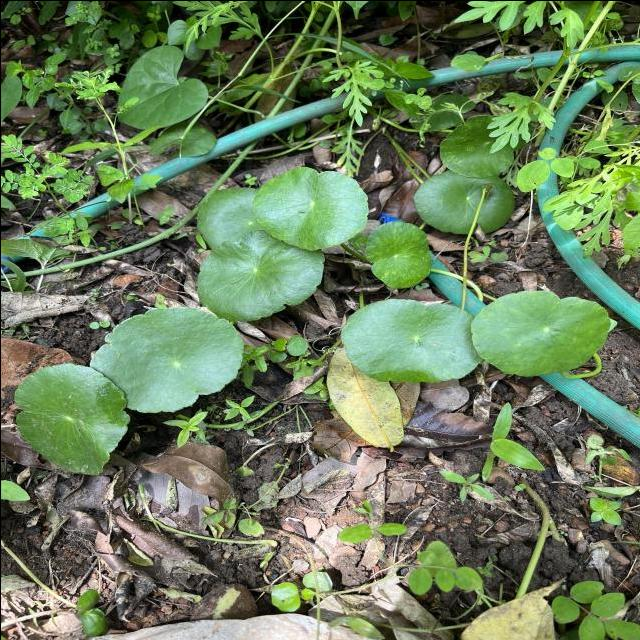

In [12]:
#| code-fold: false

train_data = CocoDetection(root = image_path, annFile = save_file, transform = None)
train_data[0][0]

Profitons pour visualiser une image du dataset d'entraînement avec ses annotations (bbox) superposées sur l'image.

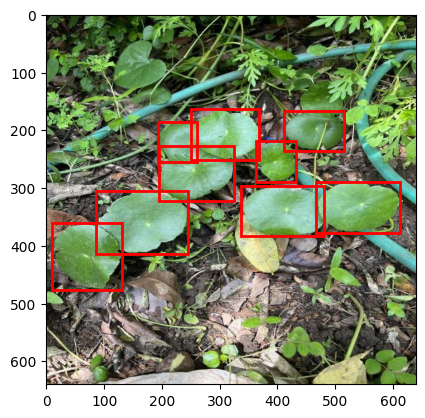

In [15]:
# Obtenir la première image et ses annotations
image, annotations = train_data[0]

# Convertir l'image PIL en tableau numpy pour l'affichage
image_np = np.array(image)

# Créer un graphique
fig, ax = plt.subplots(1)
ax.imshow(image_np)

# Tracer chaque boîte englobante
for ann in annotations:
    bbox = ann['bbox']
    # Le format de boîte englobante COCO est [x, y, largeur, hauteur]
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Afficher le graphique
plt.show()

J'espère que cela vous sera utile. N'hésitez pas à me contacter si vous avez des questions ou des recommendations. À la prochaine ! :-)